## Importing All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import time
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset i.e. GOOGLE (GOOGL) Stock Price Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/MSc. Dissertation/Dataset/nabil.csv')

In [3]:
df.head()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,3/20/2011,"1,200.00","1,190.00","1,160.00","1,170.00",0.0,853,"1,000,811.00"
1,3/24/2011,"1,162.00","1,178.00","1,150.00","1,153.00",0.0,356,"412,649.00"
2,3/25/2011,"1,153.00","1,174.00","1,145.00","1,174.00",0.0,702,"807,507.00"
3,3/27/2011,"1,174.00","1,160.00","1,120.00","1,147.00",0.0,"1,426.00","1,619,270.00"
4,3/28/2011,"1,147.00","1,150.00","1,110.00","1,132.00",0.0,352,"393,534.00"


In [4]:
df.duplicated().sum()

1

## Copying the dataset for future use

In [5]:
df1 = df.copy()
df1.reset_index(inplace=True)

In [6]:
df.reset_index(drop=True, inplace=True)

### Renaming and Dropping unwanted column

In [7]:
df.drop(['% Change', 'Turnover'], axis=1, inplace=True)
df = df.rename(columns = {
    'Ltp': 'Close',
    'Qty': 'Volume'
})

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Close'] = df['Close'].str.replace(',', '').astype(float)
df['Volume'] = df['Volume'].str.replace(',', '').astype(float).astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3083 non-null   datetime64[ns]
 1   Open    3083 non-null   float64       
 2   High    3083 non-null   float64       
 3   Low     3083 non-null   float64       
 4   Close   3083 non-null   float64       
 5   Volume  3083 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 144.6 KB


In [10]:
df

,Date,Open,High,Low,Close,Volume
0,2011-03-20,1200.0,1190.0,1160.0,1170.0,853
1,2011-03-24,1162.0,1178.0,1150.0,1153.0,356
2,2011-03-25,1153.0,1174.0,1145.0,1174.0,702
3,2011-03-27,1174.0,1160.0,1120.0,1147.0,1426
4,2011-03-28,1147.0,1150.0,1110.0,1132.0,352
...,...,...,...,...,...,...
3078,2024-09-18,562.0,565.0,550.0,556.0,68886
3079,2024-09-22,556.0,578.0,556.0,562.0,55026
3080,2024-09-23,573.2,573.2,555.0,568.0,123568
3081,2024-09-24,567.0,567.0,552.1,553.5,66337


### Splitting into features and target

In [11]:
X = df.drop(['Close', 'Date'], axis=1)
y = df['Close']

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Splitting the data into train and test set

In [13]:
# X_train, X_test, y_train, y_test = X[:round(X.shape[0]*0.8)], X[round(X.shape[0]*0.8):], y[:round(y.shape[0]*0.8)], y[round(y.shape[0]*0.8):]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building using Linear Regression

In [14]:
lr = LinearRegression()
start = time.time()
lr.fit(X_train, y_train)
end = time.time()
print('Training Time:', end-start)

Training Time: 0.002946138381958008


In [15]:
lr.score(X_train, y_train)

0.9994419693465683

In [16]:
predicted = lr.predict(X_test)
predicted

array([1148.81157771, 1602.17232907,  687.01268583, 1765.17854973,
       1071.43067124, 2319.99770985, 1149.23543459,  924.33056669,
        583.94215897, 1620.78175832,  833.11124888, 1979.56175432,
       1882.13878821, 1508.15422474, 1535.03796496, 1666.84514993,
        724.30437718, 1957.24557916,  758.36072557,  883.73498806,
        941.43202286, 1608.665521  , 1894.02049576,  432.32325705,
        829.45417335,  905.34690871, 2415.82437029, 2547.94104309,
        933.67056889,  973.59284975, 1457.03863014,  593.77216675,
       2373.62773675, 1299.16093953, 1277.53187405, 1464.62956989,
       1243.58096099, 1066.43788229,  667.69794589, 1404.70227021,
        944.6601162 ,  607.06152978, 1474.76749168,  566.45454609,
       1358.2560954 ,  915.97876642, 2413.33579329,  996.22968889,
       1493.38852199, 1971.91488672, 1744.66446517,  460.55257363,
        791.44815887,  872.72600979, 1884.01496016, 2498.66514945,
       1161.39037512,  683.59121774,  986.87556042, 1299.61567

In [17]:
y_test

,Close
1505,1145.0
2398,1598.0
1814,683.0
511,1765.0
1565,1059.0
...,...
1177,2280.0
1034,2280.0
2404,1579.0
168,873.0


In [18]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
for a in prediction.index:
    for b in df.index:
        if a == b:
            prediction['Date'] = df['Date']
prediction.set_index('Date', inplace=True)
prediction.sort_index(inplace=True)
prediction

,Actual,Predicted
Date,,
2011-03-20,1170.0,1171.414153
2011-04-13,1218.0,1176.461647
2011-04-28,1046.0,1049.235263
2011-05-04,1019.0,1022.069701
2011-05-10,1050.0,1046.997947
...,...,...
2024-07-31,649.3,639.303323
2024-08-07,631.5,621.170079
2024-09-04,595.0,603.949268


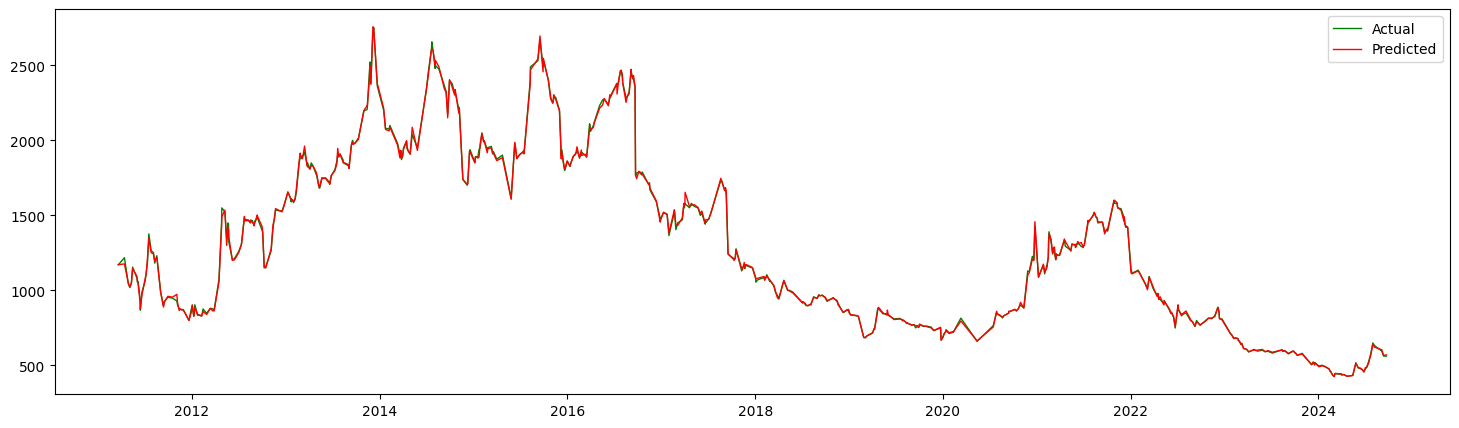

In [19]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()


In [20]:
lr.predict(scaler.transform([[580.00, 583.00, 569.00, 215581.00]]))

array([570.02546924])

## Calculating the Performance Evaluation Metrics

In [21]:
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 171.7614546877491
Root Mean Squared Error: 13.105779438390877
Mean Absolute Error: 8.76765436379869
